**Credit**

Codes in this notebook are mostly generated from the **[official YOLOv5 🚀 notebook](https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb)** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 

----

# Setup

Clone repo, install dependencies and check PyTorch and GPU. 

Connect to Google Drive to retrieve labeled datasets (in YOLO format).

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.10.0+cu111 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.9/107.7 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Inference

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Here I run pretrained YOLOv5s on the the prediction on a tiny dataset to make sure everything is ready.

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source ../drive/MyDrive/Datasets/logo15/images/train

detect: weights=['yolov5s.pt'], source=../drive/MyDrive/Datasets/logo15/images/train, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/12 /content/drive/MyDrive/Datasets/logo15/images/train/0.jpg: 288x640 1 train, Done. (0.025s)
image 2/12 /content/drive/MyDrive/Datasets/logo15/images/train/1.png: 576x640 Done. (0.035s)
image 3/12 /content/drive/MyDrive/Datasets/logo15/images/train/10.png: 352x640 Done. (0.028s)
image 4/12 /content/drive/MyDrive/Datasets/logo15/images/train/11.jpg: 384x640 5 cars, 1 st

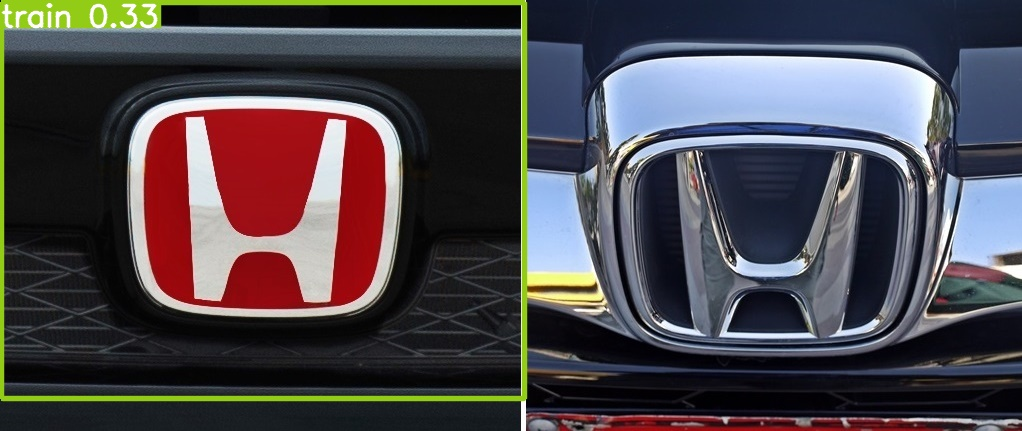

In [ ]:
# Visualization (need to adjust the file path accordingly)
display.Image(filename='runs/detect/exp2/0.jpg', width=600)

# 2. Train

Train a YOLOv5s model on customized **logo** dataset.
<br><br>

###  Data Preperation
#### 1. Create Labels

Training and Testing dataset need to be transformed into the required format. In this project, I used [makesense.ai](https://www.makesense.ai/) to label images and export labels to YOLO format. YOLO format requires one `*.txt` file per image. Specifications: 
```
3 0.734043 0.506258 0.375000 0.262829
3 0.468085 0.580100 0.132979 0.125156
#format: class(index) x_center y_center width height
```
Due to limited time, I didn't label all the provided images for every brand. Listed below are the 7 brands with **only 35 images used in train + val**:
```
infiniti, kia, lamborghini, lexus, mazda, mercedesbenz, nissan
```
<br>

#### 2. Organize Directories

Train, val and test dataset need to be organized like the struture:
```
logo/
├── images/
│   ├── train/*.jpg
│   ├── val/*.jpg
│   └── train/*.jpg
└── labels/
    ├── train/*.txt
    ├── val/*.txt
    └── train/*.txt
```
Images under [`datsset_car_logo/Train`](https://drive.google.com/drive/folders/1T5uxQbFQcDlEt9j9CocgGRQpIMWzKnRP) were split into `train/` and `val/` by 1:7; Images under [`datsset_car_logo/Test`](https://drive.google.com/drive/folders/10ZwKfxl6kAeyNLPsJrl1lFSHppB5LYOz) went to `test/` entirely.
<br><br>

#### 3. Create `logo.yaml`

Create **dataset configuration** file that defines 1) a path to directory of images, 2) the number of classes, 3) a list of class names:
```
### path to specified images for different tasks
train: ../drive/MyDrive/Datasets/logo/images/train/
val: ../drive/MyDrive/Datasets/logo/images/val/
test: ../drive/MyDrive/Datasets/logo/images/test/
# YOLOv5 locates labels automatically for each image by replacing the last instance of /images/ in each image path with /labels/


### number of classes
nc: 18

### class names
names: ['acura', 'audi', 'bmw', 'chevrolet', 'ford', 'honda', 'hyundai', 'infiniti', 'kia', 'lamborghini', 'lexus', 'mazda', 'mercedesbenz', 'nissan', 'porsche', 'tesla', 'toyota', 'volkswagen']

```
<br>

###  Model Selection - `yolov5s`
Starting from scratch is not a good idea, because: 1) the size of training dataset is pretty small 2) computing resource is limited and not assured to afford 300+ epochs. Therefore, I choose to start with pretrained **YOLOv5s** because it's the smallest and fastest YOLO v5 model.
<br><br>

### Train
Upload `logo.yaml` under `yolov5/data` before training. Starting from pretrained `--weights yolov5s.pt`, train a YOLOv5s model on customized **logo** dataset with `--data logo.yaml`.

Note:

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.


In [ ]:
# Weights & Biases
%pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.7 MB 12.8 MB/s 
     |████████████████████████████████| 143 kB 43.5 MB/s 
     |████████████████████████████████| 180 kB 50.1 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Train YOLOv5s on custom dataset with 50 epochs
!python train.py --img 640 --batch 16 --epochs 50 --data logo.yaml --weights yolov5s.pt --cache

wandb: Currently logged in as: heidi-chiehanlin (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=logo.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=

# 3. Validate
Find the best weight in previous training session and locate it to `weights/logo_nc18_best.pt`. 

Then, we can validate model's accuracy (`val.py`) and run prediction (`detect.py`) on a variety of sources. Here I would focus on **test datasts**.

In [ ]:
# Weights & Biases
%pip install -q wandb
import wandb
wandb.login()

api = wandb.Api()
run = api.run("heidi-chiehanlin/YOLOv5/dy5x1gcf")

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
     |████████████████████████████████| 180 kB 56.1 MB/s 
     |████████████████████████████████| 143 kB 50.8 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
# Validate custom model on test images
!python val.py --weights weights/logo_nc18_best.pt --data logo.yaml --img 640 --iou 0.4 --half --task test

val: data=/content/yolov5/data/logo.yaml, weights=['weights/logo_nc18_best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.4, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
test: Scanning '/content/yolov5/../drive/MyDrive/Datasets/logo/labels/test.cache' images and labels... 103 found, 2 missing, 0 empty, 0 corrupt: 100% 105/105 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0% 0/4 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 4/4 [00:41<00:00, 10.43

In [ ]:
# Inference on test images
!python detect.py --weights weights/logo_nc18_best.pt --img 640 --conf 0.4 --source ../drive/MyDrive/Datasets/logo/images/test

detect: weights=['weights/logo_nc18_best.pt'], source=../drive/MyDrive/Datasets/logo/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-237-gdc7e093 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
image 1/105 /content/drive/MyDrive/Datasets/logo/images/test/Test-Acura-0.jpg: 192x640 Done. (0.147s)
image 2/105 /content/drive/MyDrive/Datasets/logo/images/test/Test-Acura-1.jpg: 640x640 1 acura, Done. (0.485s)
image 3/105 /content/drive/MyDrive/Datasets/logo/images/test/Test-Acura-2.png: 448x640 1 volkswagen, Done. (0.301s)
image 4/105 /content/drive/MyDrive/Datasets/logo/ima

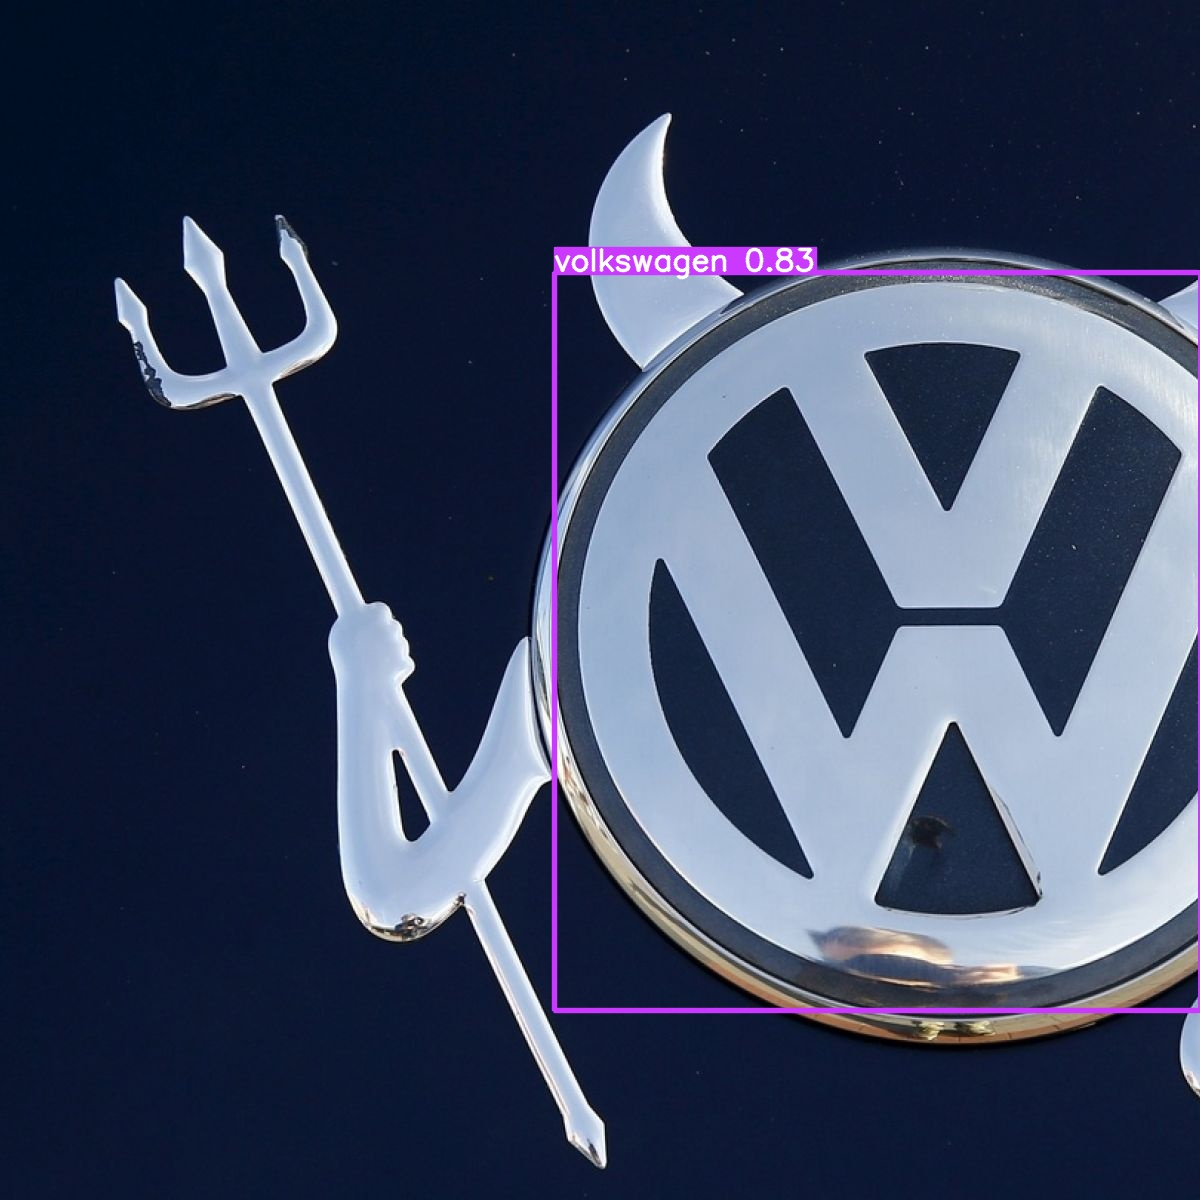

In [ ]:
# Visualization of prediction on test images
display.Image(filename='runs/detect/exp/Test-Volkswagen-3.jpg', width=600)

# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on MacOS, Windows, and Ubuntu every 24 hours and on every commit.
